   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

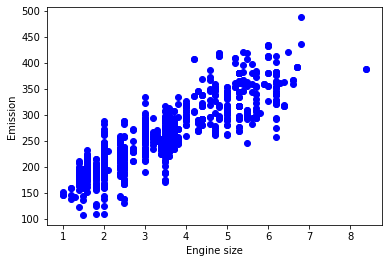

[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


 --> For Polynomial of Degree 2: 
Coefficients:  [[ 0.         49.82724968 -1.37222229]]
Intercept:  [107.58390881]


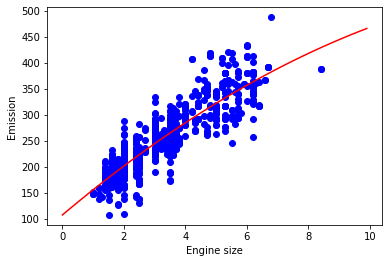

Mean absolute error: 22.72
Residual sum of squares (MSE): 866.07
R2-score: 0.71


 --> For Polynomial of Degree 3: 
Coefficients: [[ 0.         20.12958729  6.77260112 -0.67187453]]
Intercept: [139.22510769]


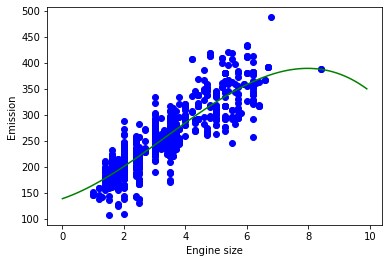

Mean absolute error: 22.91
Residual sum of squares (MSE): 882.63
R2-score: 0.71


In [25]:
###############################################################################################################################
################################################## Polynomial Regression Model ################################################
###############################################################################################################################

# About This Notebook:
# In this notebook, we will use scikit-learn for Polynomial regression. We download a dataset that is related to fuel 
# consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model 
# using training set, evaluate our model using test set, and finally use model to predict unknown value.

# Importing Needed packages:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

# Downloading Data:
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

# Understanding the Data:
# We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings 
# and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
# MODELYEAR e.g. 2014
# MAKE e.g. Acura
# MODEL e.g. ILX
# VEHICLE CLASS e.g. SUV
# ENGINE SIZE e.g. 4.7
# CYLINDERS e.g 6
# TRANSMISSION e.g. A6
# FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
# FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
# FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
# CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

# Reading the data:
df = pd.read_csv(url)
print(df.head())

# Lets select some features that we want to use for regression:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

print("\n\n -->Features that we want to use for regression: \n\n", cdf.head())

# Lets plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Creating train and test dataset:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Polynomial regression:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

# We can use LinearRegression() function to solve it:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print("\n\n --> For Polynomial of Degree 2: ")
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

# Coefficient and Intercept , are the parameters of the fit curvy line. Given that it is a typical multiple linear regression, 
# with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated 
# them from our new set of feature sets. Lets plot it:

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Evaluation:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

# Let's try to use a polynomial regression with the dataset but this time with degree three (cubic). 
# Does it result in better accuracy?
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
train_x_poly3

train_y_3 =clf.fit(train_x_poly3, train_y)
print("\n\n --> For Polynomial of Degree 3: ")
print('Coefficients:', clf.coef_)
print('Intercept:', clf.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
xx3 = np.arange(0.0, 10.0, 0.1)
yy3 = clf.intercept_[0]+ clf.coef_[0][1]*xx3 +clf.coef_[0][2]*np.power(xx3, 2)+ clf.coef_[0][3]*np.power(xx3, 3)
plt.plot(xx3, yy3, '-g')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

test_x_poly3 = poly3.fit_transform(test_x)
test_y_3 = clf.predict(test_x_poly3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_3 -test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_3 , test_y))

